In [1]:
name_student_1 = "AVIV, BITON"
name_student_2 = "MEIR, BUCHRIS"
name_student_3 = "NOY, LAGZIEL"
id1 = "206026817"
id2 = "314991878"
id3 = "209460567"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import sklearn as sk

url = 'https://raw.githubusercontent.com/Avivbiton770/Data-science/main/USA_cars_datasets.csv'
us_car_data = pd.read_csv(url)


from IPython.core.display import Image
Image(url= "https://raw.githubusercontent.com/Avivbiton770/Data-science/main/cars.png", width=650, height=650)

In [2]:
us_car_data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
us_car_data['num']=us_car_data.condition.str.extract(r'(\d+)').astype(float)
us_car_data['hour']=1
us_car_data.loc[us_car_data.condition.str.contains('day'),'hour']=24
us_car_data[us_car_data.condition.str.contains('day')]['hour']
us_car_data['hour']=us_car_data['hour']*us_car_data.num
us_car_data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,num,hour
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,10.0,240.0
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,6.0,144.0
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2.0,48.0
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22.0,22.0
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left,1.0,24.0
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left,21.0,21.0
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left,21.0,21.0
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left,2.0,48.0


In [4]:

fulldatacars=us_car_data.drop(['Unnamed: 0','vin','lot'],axis=1)
fulldatacars

,price,brand,model,year,title_status,mileage,color,state,country,condition,num,hour
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left,10.0,240.0
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left,6.0,144.0
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left,2.0,48.0
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left,22.0,22.0
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,1 days left,1.0,24.0
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,21 hours left,21.0,21.0
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,21 hours left,21.0,21.0
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,2 days left,2.0,48.0


In [5]:
fulldatacars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   country       2499 non-null   object 
 9   condition     2499 non-null   object 
 10  num           2479 non-null   float64
 11  hour          2479 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 234.4+ KB


  אנו חברה המעניקה טיווח ייעוץ והכוונה בנושאי סחר מכוניות במגרשים בארצות הברית. יזם אמריקאי מניו יורק שמעוניין להכנס לשוק זה שכר את שירותינו  בידי החברה שלנו ישנו קובץ נתונים גדול של כלל מותגי המכוניות במגרשים בארצות הברית עם מאפיינים שונים כמו מחיר,קילומטר'ז,שנת יצור,צבע וכו . על מנת לתת שירות ליזם זה אנו ננתח את הקובץ וננסה להגיע למסקנות ונייעץ לו בהתאם.  
כדי לקבל תמונה כללית לגבי המחירים הלקוח ביקש לראות את חמשת הרכבים הכי יקרים שנמצאים במגרשים בארה"ב. 

In [6]:
brandmaxprice=fulldatacars.groupby('brand').max()
brandmaxprice.sort_values('price').tail(5)


,price,model,year,title_status,mileage,color,state,country,condition,num,hour
brand,,,,,,,,,,,
bmw,61200,x3,2020,salvage insurance,216657.0,white,wisconsin,usa,7 days left,22.0,168.0
chevrolet,63200,volt,2020,salvage insurance,507985.0,yellow,wyoming,usa,Listing Expired,34.0,240.0
dodge,67000,van,2020,salvage insurance,239822.0,white,wisconsin,usa,Listing Expired,53.0,312.0
ford,74000,wagon,2020,salvage insurance,999999.0,yellow,wisconsin,usa,Listing Expired,48.0,360.0
mercedes-benz,84900,vans,2019,clean vehicle,110907.0,white,new york,usa,20 hours left,20.0,48.0


אחרי שצפה במחירי הרכבים והנתונים עליהם החליט הלקוח על קריטריונים מסויימים שלפיהם יבחר את הרכבים והם : מיקום הרכב : ניו יורק, שנת רכב:מעל 2013 ומחיר שלא יעלה על 50 אלף דולר לרכב 

In [7]:
new_york_cars=fulldatacars[fulldatacars.state.str.contains('new york')]
new_york_cars
by_mileage_car=new_york_cars[new_york_cars['year']>2013]
data_Cars_Customization=by_mileage_car[by_mileage_car['price']<=50000]
data_Cars_Customization

,price,brand,model,year,title_status,mileage,color,state,country,condition,num,hour
31,18500,infiniti,q70,2016,clean vehicle,71967.0,gray,new york,usa,19 hours left,19.0,19.0
36,16600,mercedes-benz,vans,2016,clean vehicle,110907.0,white,new york,usa,19 hours left,19.0,19.0
41,16600,mercedes-benz,vans,2016,clean vehicle,97983.0,white,new york,usa,19 hours left,19.0,19.0
176,7900,ford,door,2014,clean vehicle,79422.0,white,new york,usa,21 hours left,21.0,21.0
397,4150,jeep,door,2014,clean vehicle,108895.0,white,new york,usa,2 days left,2.0,48.0
407,7770,jeep,door,2014,clean vehicle,72732.0,gray,new york,usa,2 days left,2.0,48.0
417,5998,hyundai,doors,2014,clean vehicle,122975.0,phantom black,new york,usa,5 days left,5.0,120.0
418,3700,honda,doors,2014,clean vehicle,162824.0,blue,new york,usa,2 days left,2.0,48.0
695,17700,chevrolet,equinox,2019,clean vehicle,25223.0,white,new york,usa,18 hours left,18.0,18.0
748,24300,chevrolet,1500,2018,clean vehicle,56296.0,black,new york,usa,18 hours left,18.0,18.0


  הצגה של סוג המכוניות וכמותן בניו יורק 



<AxesSubplot:xlabel='brand', ylabel='count'>

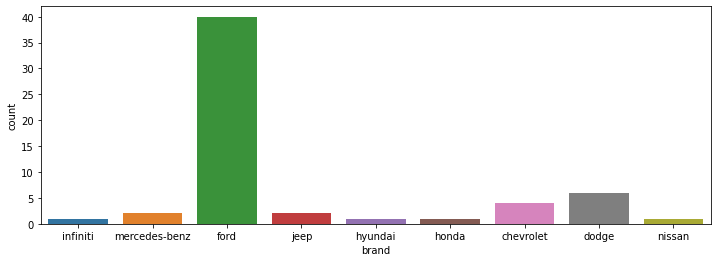

In [8]:
plt.figure(figsize=(12,4)) 
sns.countplot(x="brand", data=data_Cars_Customization)


#### ניתן לראות מהגרף כי מותג פורד הוא הרכב הכי פופולרי למכירה במגרשי המכוניות בניו יורק . לכן נמליץ ליזם להתמקד ביבוא רכבי פורד כדי להגדיל את פוטנציאל המכירות  .  
[Type of best-selling vehicle in the US](https://www.statista.com/chart/3109/americas-best-selling-vehicles-in-2014/)

In [9]:
new_york_ford_cars=data_Cars_Customization[data_Cars_Customization.brand.str.contains('ford')]
new_york_ford_cars

,price,brand,model,year,title_status,mileage,color,state,country,condition,num,hour
176,7900,ford,door,2014,clean vehicle,79422.0,white,new york,usa,21 hours left,21.0,21.0
1207,21289,ford,doors,2015,clean vehicle,71955.0,gray,new york,usa,12 days left,12.0,288.0
1604,18900,ford,doors,2015,clean vehicle,44456.0,charcoal,new york,usa,10 days left,10.0,240.0
1608,18288,ford,doors,2015,clean vehicle,45218.0,gray,new york,usa,10 days left,10.0,240.0
1776,26300,ford,f-150,2018,clean vehicle,11739.0,silver,new york,usa,18 hours left,18.0,18.0
1781,12100,ford,escape,2017,clean vehicle,32284.0,silver,new york,usa,18 hours left,18.0,18.0
1783,9500,ford,escape,2017,clean vehicle,107569.0,white,new york,usa,18 hours left,18.0,18.0
1787,17200,ford,f-150,2017,clean vehicle,91979.0,white,new york,usa,18 hours left,18.0,18.0
1788,18800,ford,explorer,2017,clean vehicle,76258.0,gray,new york,usa,18 hours left,18.0,18.0
1886,24549,ford,doors,2016,clean vehicle,44941.0,shadow black,new york,usa,11 days left,11.0,264.0


In [25]:
ptLunchEduc = EducLunchMean_ScoreData.pivot_table('lunch_cat','parental level of education')
new_york_ford_cars.pivot_table('price', index='hour', columns='color', aggfunc='mean') 

color,black,blue,charcoal,color:,gray,green,ingot silver metallic,magnetic metallic,orange,oxford white,red,ruby red,shadow black,silver,white,white platinum tri-coat metallic
hour,,,,,,,,,,,,,,,,
18.0,17300.0,10800.0,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19200.0,13350.0,NaN
21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,NaN
216.0,15349.2,15995.0,NaN,25998.0,14987.5,29590.0,NaN,17044.5,31790.0,13995.0,NaN,NaN,NaN,13995.0,15495.0,15290.0
240.0,NaN,NaN,18900.0,NaN,18288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264.0,21661.0,NaN,NaN,NaN,NaN,24970.0,27990.0,NaN,NaN,NaN,21000.0,34995.0,24549.0,19440.0,20495.0,NaN
288.0,NaN,NaN,NaN,NaN,21289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####   כעת נבדוק נתונים נוספים כמו סוג הצבע הפופולרי ביותר ,כמה רכבים יש מכל דגם וכל כמה זמן בממוצע עוזב רכב את המגרש (כל כמה זמן רכב נמכר)

<AxesSubplot:>

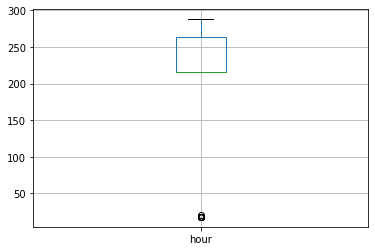

In [12]:
new_york_ford_cars.boxplot(column=['hour'])


[Text(0, 0, 'white'),
 Text(1, 0, 'gray'),
 Text(2, 0, 'charcoal'),
 Text(3, 0, 'silver'),
 Text(4, 0, 'shadow black'),
 Text(5, 0, 'black'),
 Text(6, 0, 'green'),
 Text(7, 0, 'red'),
 Text(8, 0, 'blue'),
 Text(9, 0, 'ruby red'),
 Text(10, 0, 'color:'),
 Text(11, 0, 'ingot silver metallic'),
 Text(12, 0, 'oxford white'),
 Text(13, 0, 'orange'),
 Text(14, 0, 'white platinum tri-coat metallic'),
 Text(15, 0, 'magnetic metallic')]

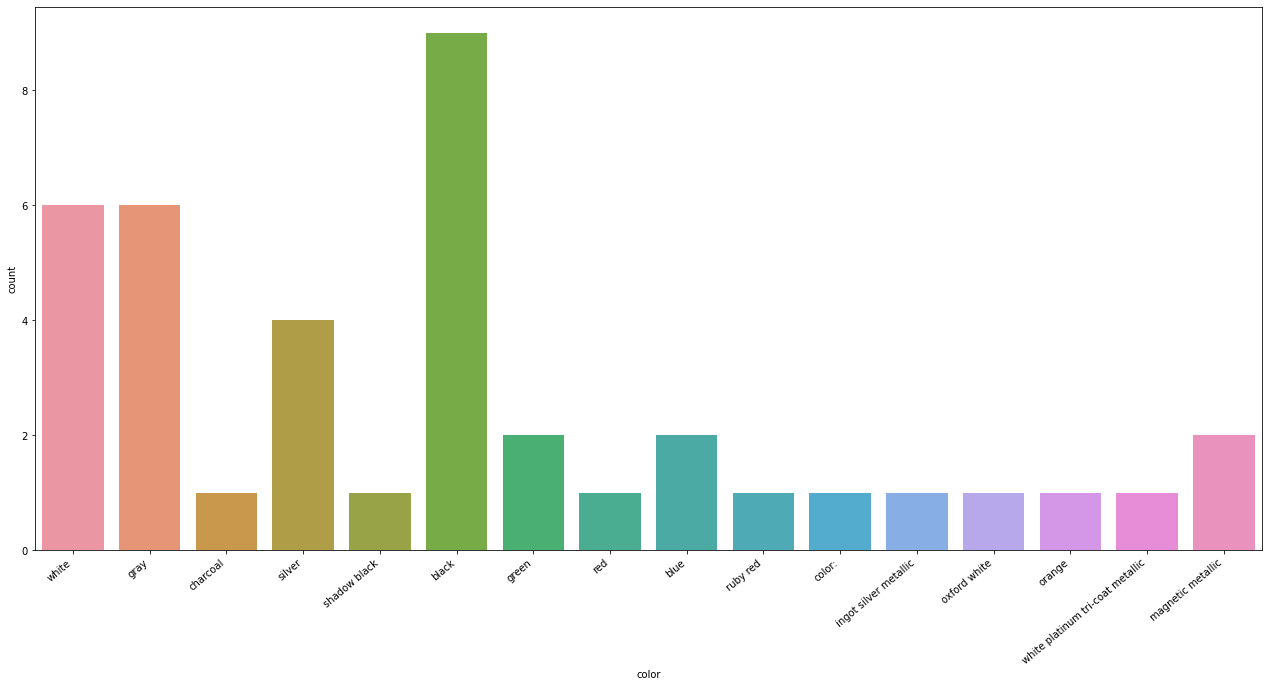

In [13]:
fig, axes = plt.subplots(figsize=(22, 10), ncols=1)
ax=sns.countplot( x="color", data=new_york_ford_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


<AxesSubplot:xlabel='model', ylabel='price'>

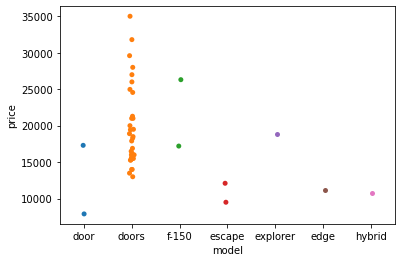

In [14]:
sns.stripplot(x="model", y="price", data=new_york_ford_cars, jitter=0.05)


##### ניתן לשים לב שבדגם הפופולרי ביותר קיים מנעד רחב של מחירים

#### נבדוק קורולציות בין המשתנים

In [ ]:
spr_data=new_york_ford_cars[['price','year','mileage','hour']].corr(method='spearman').round(2)
sns.heatmap(data=spr_data,cmap='Blues', annot=True)

In [ ]:
sns.regplot(x='year', y='price', data=new_york_ford_cars)

#### מגרף זה ניתן לראות ששנת 2017 שיחסית שנה מתקדמת יש כמה רכבים שמכירם נמוך יחסית . עלה בדעתנו לבדוק את הרכב האידיאלי ללקוחות עם בעיה כלכלית שרוצים רכב די חדיש של פורד. והוא מתבסס על שנת יצור עדכנית במחיר נמוך .
##### במקרים שלקוחות מוגבלים כלכלית ורוצים לרכוש פורד די חדישה ממגרש המכוניות אנו נמליץ ליזם שיקדיש לנישה הזו את הרכבים האלו שיתנו מענה איכותי לבקשות אלה וכך השירות והמענה הכלכלי יעלה רמה אחת מעל בחברה  .     
#####  בנוסף לגרף זה רצינו לבדוק לאותם רכבים מהו הרכב בעל הקילומטר'ז הכי נמוך כדי למקסם את הכדאיות של רכישת הרכב

In [ ]:
desirable_car=new_york_ford_cars[new_york_ford_cars['year']==2017]
desirable_car2=desirable_car[desirable_car['price']>=5000]
desirable_car3=desirable_car2[desirable_car2['price']<=20000]
desirable_car3.sort_values('mileage')



In [ ]:
ax = sns.stripplot(x="year", y="hour", data=new_york_ford_cars, jitter=0.1)
ax.set(ylim=(0, 300))

####  התפלגות זו מחזקת את מסקנתנו מהגרף הקודם שבשנת 2017 יש את הרכבים הכי אטרקטיבים -מכיוון שמגיע כאן נתון מעניין שבנוסף לטווח המחירים היחסית נמוכים והקילומטר'ז הנמוך, ברכבים האלה זמן המדף היה הכי קצר משמע הם נמכרו הכי מהר 

In [ ]:
sns.regplot(x='mileage', y='price', data=new_york_ford_cars);

#### כמצופה ניתן לראות קשר בין ירידת מחיר הרכב לבין גידול בקילומטר'ז .

עקב הרצון של החברה שלנו להתייעל מול היזם רצינו לבנות מודל שיינבא ככל הניתן את מחיר הרכב בהתחם לפרמטרים של שנת יצור קילומטר'ז וזמן מדף.  


In [ ]:
features1 = ['year','mileage','hour']
x1 = new_york_ford_cars[features1]
y1 = new_york_ford_cars['price']
x1_train, x1_test, y1_train, y1_test = sk.model_selection.train_test_split(x1, y1, test_size=0.3, random_state=42)
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(x1_train,y1_train)

def eval(x1_test,y1_test,model1):
    pred1 = model1.predict(x1_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred1,y1_test,squared=False)))
eval(x1_test,y1_test,model1)

In [ ]:
y1_test.std()

עקב המודל הלא מדוייק שקיבלנו חשבנו להתייעל ע"פ מודל אחר שהוא - ניבוי שנת הרכב בהתאם לפרמטרים של מחיר,קילומטר'ז וזמן מדף. 

In [401]:
features2 = ['price','mileage','hour']
X2 = new_york_ford_cars[features2]
y2 = new_york_ford_cars['year']
X2_train, X2_test, y2_train, y2_test = sk.model_selection.train_test_split(X2, y2, test_size=0.3, random_state=1)

model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X2_train,y2_train)

def eval(x2_test,y2_test,model2):
    pred2 = model2.predict(x2_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred2,y2_test,squared=False)))
eval(X2_test,y2_test,model2)

MSE: 0.866


In [313]:
y2_test.std()

1.3568010505999362

#### בהתאם לתוצאות שני המודלים אנו רואים בצורה ברורה שהמודל השני ניבא בצורה חד משמעית טובה יותר. לכן נציע ליזם שירות במודל זה על מנת לעזור לו 

